### SI 370 - Homework #3: Applied Statistics

## Background

This homework assignment focuses on data from the [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness).

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

We will be using data from the 2016 report.

Your main task in this assignment is to explore the data *using the data
manipulation, analysis, visualization, and applied statistical methods we covered in class* as well as those in the assigned readings. 

** You should also feel free to ask questions on the __[class Slack channel](https://si370fa2018.slack.com/messages/CCQLTNS65/team/UCFLDB049/)__ ! **

A total of 30 points is available in this homework assignment.

Questions 1-6 are worth 5 points each.  Points will be allocated according to the following rubric:

- 5 points: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 4 points: Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in written interpretation.
- 3 points: Answer has significant omissions or errors; Noticeable departure from PEP-8 guidelines and/or moderate spelling, grammar, or style issues in written interpretations.
- 2 points: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.


In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [25]:
happiness = pd.read_csv('data/world-happiness-2016.csv')

In [26]:
happiness.shape

(157, 13)

In [27]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [28]:
happiness.tail(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.0432,0.09419,0.2029,2.10404


## Answer the questions below. 
For each question, you should
1. Write code that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### <font color="magenta"> Q1: What are the top 5 correlation coefficients among "Happiness Score", Economy, Family, Health, Freedom, Trust, and Generosity? Provide a visualization as well as a written statement of your findings. (5 points)

In [29]:
hap = happiness.drop(['Country', 'Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1)
c = hap.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so[so < 1][:10]

Health (Life Expectancy)  Economy (GDP per Capita)    0.837067
Economy (GDP per Capita)  Health (Life Expectancy)    0.837067
Happiness Score           Economy (GDP per Capita)    0.790322
Economy (GDP per Capita)  Happiness Score             0.790322
Happiness Score           Health (Life Expectancy)    0.765384
Health (Life Expectancy)  Happiness Score             0.765384
Happiness Score           Family                      0.739252
Family                    Happiness Score             0.739252
Economy (GDP per Capita)  Family                      0.669540
Family                    Economy (GDP per Capita)    0.669540
dtype: float64

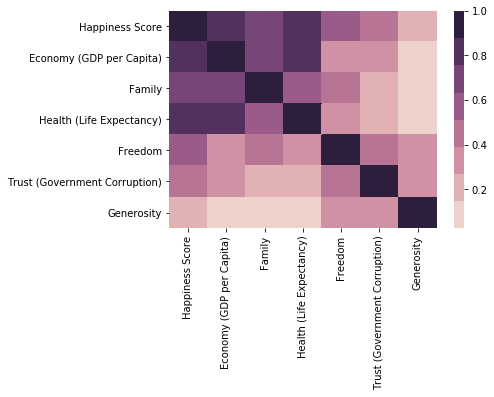

In [30]:
sns.heatmap(c,cmap=sns.cubehelix_palette(8))

The top 5 correlation coefficients among these variables are the following:
 - health and economy
 - happiness score and economy
 - happiness score and health
 - happiness score and famiy
 - economy and family

This came from calling .corr(), which provides a table of the correlation between each element in the dataframe. I then sorted by the correlation value so the largest values would be at the top, and showed just the top 10. I showed the top 10 because each relationship is shown twice, so to get the top 5, we need to display the top 10. 

In the heatmap shown above, we can see these correlations as the darker colors, ignoring the middle diagonal where the variables are compared against themselves. 

Having a high positive correlation coefficient means that if one of these increases, the other does as well. For example, here, if Health (Life Expectancy) goes up, so will Economy (GDP per Capita). 

### <font color='magenta'> Q2: Describe, using plots, the relationships between the following variables: (5 points) </font>
1. Happiness vs. Family
2. Happiness vs. Economy
3. Happiness vs. Health
4. Happiness vs. Freedom
5. Happiness vs. Trust
6. Happiness vs. Generosity

You have, at this point, a wide variety of visualizations that you know how to generate.  Choose wisely!

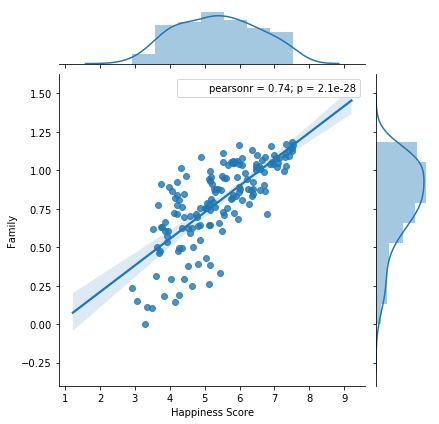

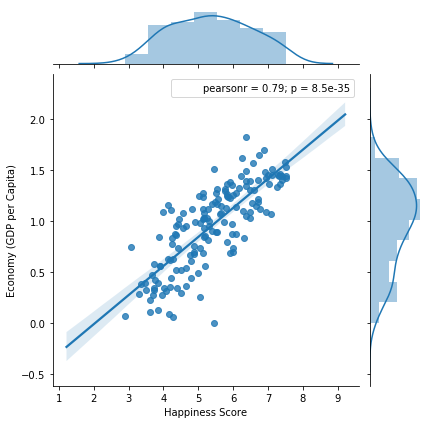

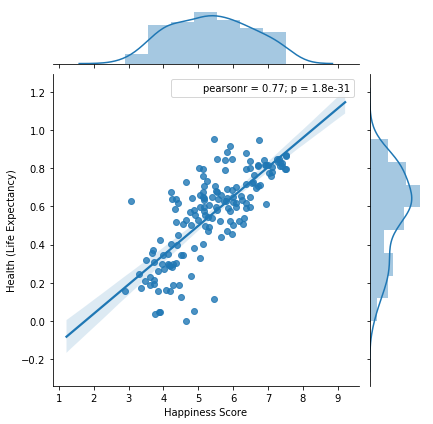

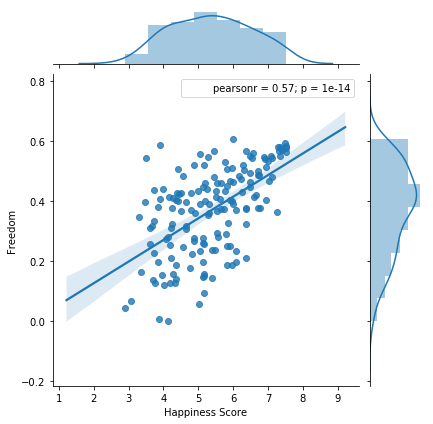

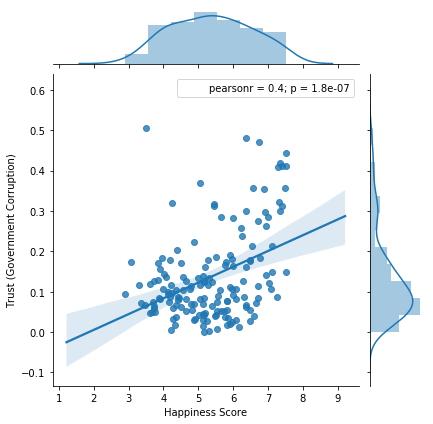

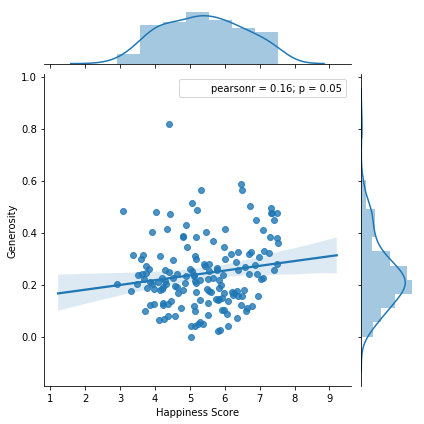

In [31]:
# happiness vs. family
ax1 = sns.JointGrid(data=happiness,x='Happiness Score',y='Family')
ax1 = ax1.plot(sns.regplot, sns.distplot)
ax1 = ax1.annotate(stats.pearsonr)

# happiness vs. economy
ax2 = sns.JointGrid(data=happiness,x='Happiness Score',y='Economy (GDP per Capita)')
ax2 = ax2.plot(sns.regplot, sns.distplot)
ax2 = ax2.annotate(stats.pearsonr)

# happiness vs. health
ax3 = sns.JointGrid(data=happiness,x='Happiness Score',y='Health (Life Expectancy)')
ax3 = ax3.plot(sns.regplot, sns.distplot)
ax3 = ax3.annotate(stats.pearsonr)

# happiness vs. freedom
ax4 = sns.JointGrid(data=happiness,x='Happiness Score',y='Freedom')
ax4 = ax4.plot(sns.regplot, sns.distplot)
ax4 = ax4.annotate(stats.pearsonr)

# happiness vs. trust
ax5 = sns.JointGrid(data=happiness,x='Happiness Score',y='Trust (Government Corruption)')
ax5 = ax5.plot(sns.regplot, sns.distplot)
ax5 = ax5.annotate(stats.pearsonr)

# happiness vs. generosity
ax6 = sns.JointGrid(data=happiness,x='Happiness Score',y='Generosity')
ax6 = ax6.plot(sns.regplot, sns.distplot)
ax6 = ax6.annotate(stats.pearsonr)

For this question, we made several plots by using distplots.

Looking at these plots, we can see the following:
- For Happiness vs. Family, there appears to be a fairly strong correlation. We can see that from the decently steep line and the P value of 0.74.
- For Happiness vs. Economy, there appears to be a fairly strong correlation. We can see that from the decently steep line and the P value of 0.79.
- For Happiness vs. Health, there appears to be a fairly strong correlation. We can see that from the decently steep line and the P value of 0.77.
- For Happiness vs. Freedom, there appears to be a less strong correlation. We can see that from the somewhat steep line and the P value of 0.57.
- For Happiness vs. Trust, there appears to be a somewhat weak correlation. We can see that from the somewhat horizontal line and the P value of 0.40.
- For Happiness vs. Generosity, there appears to be a fairly weak correlation. We can see that from the fairly horizontal line and the P value of 0.16.

### <font color="magenta"> Q3: Does there appear to be an interaction between region and happiness quartile? (5 points)
    
Create a new variable that represents which quartile each country's happiness score is in.  For example, the first 39 or 40 countries are in the 4th happiness quartile (it's up to you to decide exactly how to divide the countries into happiness quartiles).
    
(Hint: contingency tables, mosaic plots, and chi-square may be useful here).

In [32]:
# use pd.qcut function to split happiness score into 4 quartiles
quarts = pd.qcut(happiness['Happiness Score'], 4, labels=['1', '2', '3', '4'])

# make a new dataframe with these labels as a new row
hap_quarts = happiness.copy()
hap_quarts['quartile'] = quarts
hap_quarts.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,quartile
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,4
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,4
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,4
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,4
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,4


In [33]:
# do a crosstab with region and happiness quartiles from above, make region rows q's cols
ct = pd.crosstab(hap_quarts['Region'], hap_quarts['quartile'],margins=True)

# get rid of the "All" columns
ct = ct.drop('All')
ct = ct.drop('All', axis = 1)
ct

quartile,1,2,3,4
Region,,,,
Australia and New Zealand,0,0,0,2
Central and Eastern Europe,4,9,15,1
Eastern Asia,0,2,3,1
Latin America and Caribbean,1,2,11,10
Middle East and Northern Africa,3,7,4,5
North America,0,0,0,2
Southeastern Asia,2,4,1,2
Southern Asia,2,5,0,0
Sub-Saharan Africa,28,8,2,0


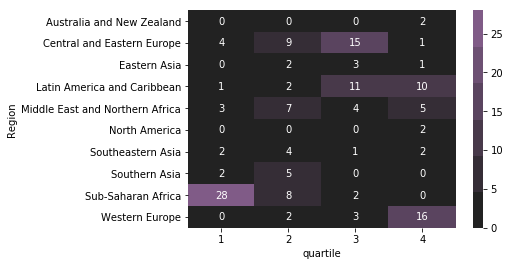

In [34]:
# do a mosaic plot - regions are x quartiles are y

# from statsmodels.graphics.mosaicplot import mosaic
# t = mosaic(hap_quarts, ['Region','quartile'],title='Effect of Region on Happiness')

# I got a wild error
# I'm not sure a mosiacplot will work here because there are more than 2 y dimensions

# I'll do a heatmap instead
sns.heatmap(ct, annot=True, cmap=sns.dark_palette("muted purple", input="xkcd"))

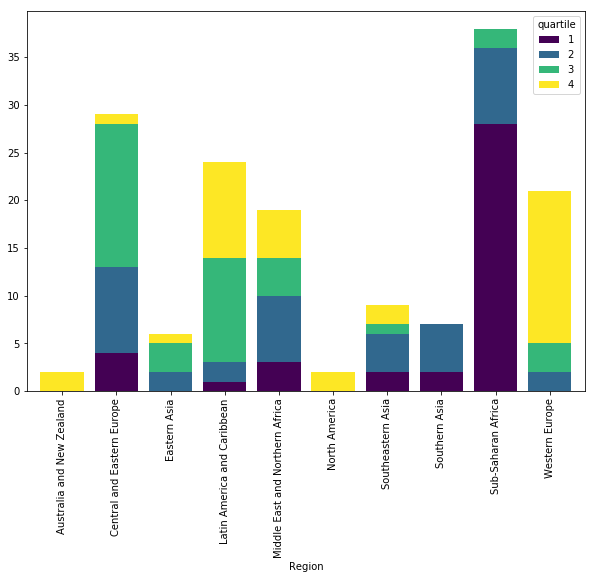

In [35]:
# this might look better as a stacked bar graph as well because that's somewhat similar to a mosiac plot
# we will put the regions on the bottom and then the amount the quartiles show up as the bars

viridis = cm.get_cmap('viridis', 4)
colors = [viridis.colors[0], viridis.colors[1], viridis.colors[2], viridis.colors[3]]
ct.plot.bar(stacked=True, color=colors, figsize=(10,7), width = 0.8)

In [36]:
# chi quared test
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  139.6164992152685
p-val =  3.823562988526965e-17
degree of freedom =  27
Expected:


,0,1,2,3
0,0.509554,0.496815,0.496815,0.496815
1,7.388535,7.203822,7.203822,7.203822
2,1.528662,1.490446,1.490446,1.490446
3,6.114650,5.961783,5.961783,5.961783
4,4.840764,4.719745,4.719745,4.719745
5,0.509554,0.496815,0.496815,0.496815
6,2.292994,2.235669,2.235669,2.235669
7,1.783439,1.738854,1.738854,1.738854
8,9.681529,9.439490,9.439490,9.439490
9,5.350318,5.216561,5.216561,5.216561


Here we did several things. First, we split up the countries into quartiles based on their Happiness Score, and added that to the table. The 4th quartile means the highest Happiness Score, the 1st quartile is the lowest score. 

Then we did a crosstab by region to see how many countires of each quartile were in each region. To visualize this, we used first a heatmap, and then a stacked bar graph. This helps us see which regions seems to be the happiest or least happy, based off of this dataset. Based off of our graphs, we can see that it appears that regions like North America, Australia and New Zealand, and Western Europe have lots of high ranking countries, while Sub-Saharan Africa seems to have to lowest ranking countries.

After running a chi squared test, we can see that the because the P value is very small, there is a very low chance that this is random. Therefore we can say that there is a statistically significant influence on Happiness Score by Region.

### <font color="magenta">Q4: Use a linear regression to model the relationship between Happiness Score and Family.  (5 points)

What does this tell you about the relationship?


You may wish to include a visualization.

In [37]:
model = smf.ols(" Q('Happiness Score') ~ Family", data=happiness).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Q('Happiness Score')   R-squared:                       0.546
Model:                              OLS   Adj. R-squared:                  0.544
Method:                   Least Squares   F-statistic:                     186.8
Date:                  Tue, 22 Oct 2019   Prob (F-statistic):           2.09e-28
Time:                          01:27:56   Log-Likelihood:                -181.00
No. Observations:                   157   AIC:                             366.0
Df Residuals:                       155   BIC:                             372.1
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8708      0.194     14.813      0.000       2.488       3.254
Family         3.1645      0.232     13.667      0.000       2.707       3.622
==============================================================================
Omnibus:                        5.248   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                4.375
Skew:                          -0.313   Prob(JB):                        0.112
Kurtosis:                       2.475   Cond. No.                         6.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The rsquared value is 0.5464928946987393


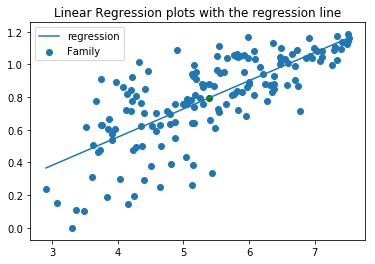

In [38]:
lm = sm.OLS(happiness['Family'], sm.add_constant(happiness['Happiness Score'])).fit()
print("The rsquared value is " + str(lm.rsquared))

plt.scatter(np.sort(happiness['Happiness Score']), happiness['Family'][np.argsort(happiness['Happiness Score'])])
plt.scatter(np.mean(happiness['Happiness Score']), np.mean(happiness['Family']), color = "green")
# plt.plot(np.sort(happiness['Happiness Score']), y0[np.argsort(happiness['Happiness Score'])], label = "actual")
plt.plot(np.sort(happiness['Happiness Score']), lm.predict()[np.argsort(happiness['Happiness Score'])], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

Here we used a linear regression to show the relationship between Happiness Score and Family. From the table displayed above, we can see that there is a P value of less than 0.05, meaning that we would reject the null hypothesis, meaning that Family does have a statistically significant impact on Happiness Score.

We see this again in the plot below that shows the regression line, as it is sloping upwards, showing a positive correlation between Family and Happiness Score.

### <font color="magenta">Q5: Do happiness scores vary significantly between regions?  Which region has the highest mean happiness score? (5 points)

You may wish to include a visualization.
Hint: ANOVA might help here.

In [39]:
hap_lm = ols(" Q('Happiness Score') ~ Region", data=happiness).fit()
table = sm.stats.anova_lm(hap_lm, type=2) # Type 2 ANOVA DataFrame
table

,df,sum_sq,mean_sq,F,PR(>F)
Region,9.0,126.691462,14.076829,26.999543,4.573860e-27
Residual,147.0,76.641811,0.521373,NaN,NaN


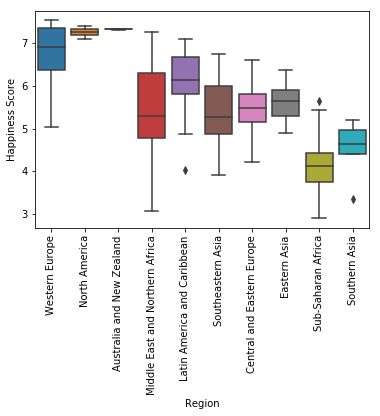

In [40]:
# box plot see stats I
ax = sns.boxplot(x='Region', y='Happiness Score', data=happiness)
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [41]:
# group by region at happiness score take mean sort descending see top
happiness.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).head(1)

Region
Australia and New Zealand    7.3235
Name: Happiness Score, dtype: float64

First here, we run an ANOVA, which helps us see if there are statistically significant differences in a variable based on another variable (here, in Happiness Score based on Region). We get an incredibly small p value, which means that there is an incredibly small chance this is random, and that there is a significant difference in Happiness Scores between regions. We can show this visually as well with a box plot, displayed below the ANOVA table.

The region with the highest mean Happiness Score is Austrailia and New Zealand. This is shown in the box plot as well, as we can see that the plot for that region is high and all squished together, meaning that the mean would be high as well.

### <font color="magenta">Q6: Which Eastern Asian country has the lowest happiness score.  Comment on the influence that that country has on the relationship between Happiness and Economy.

Hint: you may want to look at the residuals of a regression between Happiness and Economy.

In [42]:
# narrow down to east asia region, do tail
asia_hap = happiness[happiness.Region == 'Eastern Asia']
asia_hap = asia_hap.set_index('Country')
asia_hap.tail(1)
# asia_hap

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Mongolia,Eastern Asia,101,4.907,4.838,4.976,0.98853,1.08983,0.55469,0.35972,0.03285,0.34539,1.53586


The rsquared value is 0.5005117806489173


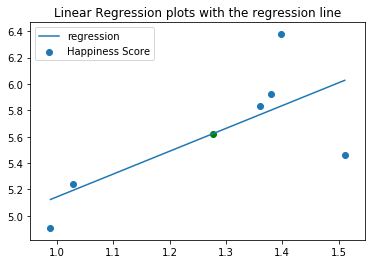

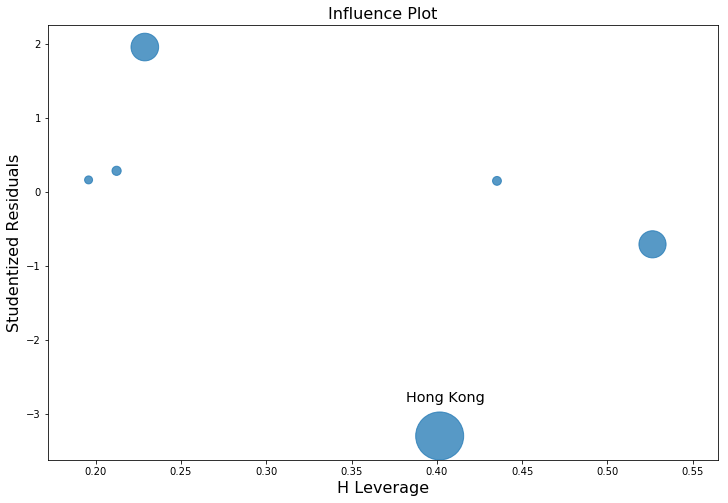

In [43]:
lm = smf.ols("Q('Happiness Score') ~ Q('Economy (GDP per Capita)')", asia_hap).fit()
print("The rsquared value is " + str(lm.rsquared))

plt.scatter(np.sort(asia_hap['Economy (GDP per Capita)']), asia_hap['Happiness Score'][np.argsort(asia_hap['Economy (GDP per Capita)'])])
plt.scatter(np.mean(asia_hap['Economy (GDP per Capita)']), np.mean(asia_hap['Happiness Score']), color = "green")
# plt.plot(np.sort(happiness['Happiness Score']), y0[np.argsort(happiness['Happiness Score'])], label = "actual")
plt.plot(np.sort(asia_hap['Economy (GDP per Capita)']), lm.predict()[np.argsort(asia_hap['Economy (GDP per Capita)'])], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, ax= ax, criterion="cooks")

In [44]:
infl = lm.get_influence()
c,p = infl.cooks_distance
df = pd.DataFrame.from_dict({'cooks_distance':c,'pvalue':p})
df.index = asia_hap.index
df

,cooks_distance,pvalue
Country,,
Taiwan,0.332119,0.735459
Japan,0.013956,0.986189
South Korea,0.004108,0.995904
Hong Kong,1.052010,0.429426
China,0.010959,0.989131
Mongolia,0.319529,0.743465


The East Asian country with the lowest Happiness Score is Mongolia. We get this be filtering the table to only see countries from this region, and then sorting them by Happines Score, and grabbing the last one.

Although Mongolia has the lowest Happiness Score, it does not really seem to be influential in the relationship between Happiness Score and Economy. When we plot out the Cooks Distances of the East Asian Countries, it shows that Hong Kong has the largest distance, meaning that it has the largest influence on the relationship between Economy and Happiness Score. 

Looking at the linear regression plot, we can see that Hong Kong is the dot the furthest to the right. This shows that it has the largest economy of the region, but not a very high happiness score. If Hong Kong were not in this region, the regression line would likely be steeper, where if Mongolia left, we would not see much of a difference.

## <font color='green'> Please submit your completed notebook in .HTML format via Canvas </font>

## Kelsey Toporski, ktops